<a href="https://www.kaggle.com/code/yahyasoker/song-name-to-genre-prediction?scriptVersionId=155574269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
# Reading data
df = pd.read_csv("/kaggle/input/billboard-hot-100-audio-features/Hot 100 Audio Features.csv")

In [3]:
#looking to Data
df.head()

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [4]:
# looking to Null values
df.isnull().sum()

index                            0
SongID                           0
Performer                        0
Song                             0
spotify_genre                 1600
spotify_track_id              5106
spotify_track_preview_url    15012
spotify_track_duration_ms     5106
spotify_track_explicit        5106
spotify_track_album           5112
danceability                  5169
energy                        5169
key                           5169
loudness                      5169
mode                          5169
speechiness                   5169
acousticness                  5169
instrumentalness              5169
liveness                      5169
valence                       5169
tempo                         5169
time_signature                5169
spotify_track_popularity      5106
dtype: int64

In [5]:
# deleting and resetting index
df = df.dropna()
df = df.reset_index(drop=True)

In [6]:
df.isnull().sum()

index                        0
SongID                       0
Performer                    0
Song                         0
spotify_genre                0
spotify_track_id             0
spotify_track_preview_url    0
spotify_track_duration_ms    0
spotify_track_explicit       0
spotify_track_album          0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature               0
spotify_track_popularity     0
dtype: int64

In [7]:
df['spotify_genre']

0        ['adult standards', 'brill building pop', 'eas...
1                    ['dance pop', 'pop', 'post-teen pop']
2        ['album rock', 'bubblegum pop', 'country rock'...
3           ['country', 'country dawn', 'nashville sound']
4        ['funk', 'motown', 'neo soul', 'new jack swing...
                               ...                        
14360    ['bubblegum pop', 'classic garage rock', 'frea...
14361        ['alternative metal', 'metal', 'post-grunge']
14362    ['atl hip hop', 'hip hop', 'pop rap', 'rap', '...
14363      ['adult standards', 'easy listening', 'lounge']
14364                                        ['freestyle']
Name: spotify_genre, Length: 14365, dtype: object

In [8]:
# text cleaning 
import re

def clean_text(text, extract_first=True, convert_to_lowercase=True):
    # Convert to string
    text = str(text)

    if extract_first:
        # Extract the first text enclosed in single quotes
        match = re.search(r"'([^']+)'", text)
        if match:
            cleaned_text = match.group(1)
        else:
            cleaned_text = ""
    else:
        # Remove special characters and digits
        cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespaces
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    if convert_to_lowercase:
        # Convert all characters to lowercase
        cleaned_text = cleaned_text.lower()

    return cleaned_text

y = df['spotify_genre'].apply(lambda x: clean_text(x, extract_first=True))
x = df['Song'].apply(lambda x: clean_text(x, extract_first=False))

In [9]:
print(y)

0          adult standards
1                dance pop
2               album rock
3                  country
4                     funk
               ...        
14360        bubblegum pop
14361    alternative metal
14362          atl hip hop
14363      adult standards
14364            freestyle
Name: spotify_genre, Length: 14365, dtype: object


In [10]:
# factorization for y
import numpy as np
y = pd.factorize(df['spotify_genre'])[0]

unique_values = np.unique(y)
num_unique_values = len(unique_values)

In [11]:
print(x)

0                and roses and roses
1                 baby one more time
2                        love affair
3        til i can make it on my own
4             til my baby comes home
                    ...             
14360                       zip code
14361                         zombie
14362                           zoom
14363                zorba the greek
14364                     zunga zeng
Name: Song, Length: 14365, dtype: object


In [12]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size=0.2 means that 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# Import the Tokenizer class from Keras
from keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
tokenizer = Tokenizer()

# Build the vocabulary based on the training dataset
tokenizer.fit_on_texts(x_train)

# Tokenize the training and test datasets
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# Vocabulary size (number of unique words) -> will be used in the embedding layer
vocab_size = len(tokenizer.word_index) + 1

In [14]:
# Import the pad_sequences function from Keras
from keras.preprocessing.sequence import pad_sequences

# Find the maximum length of sequences in the training set
max_length = max(len(seq) for seq in x_train)

# Check for outliers in the test set and print any sequences that exceed the maximum length
for x in x_test:
    if len(x) > max_length:
        print(f"An outlier detected: {x}")

# Pad sequences to have a uniform length (max_length)
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [15]:
# Import the to_categorical function from Keras utils
from keras.utils import to_categorical

# Convert the categorical labels to one-hot encoded format for both training and testing sets
# 'num_classes=num_unique_values' indicates the number of classes in the classification task
y_test = to_categorical(y_test, num_classes=num_unique_values)
y_train = to_categorical(y_train, num_classes=num_unique_values)

In [16]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


# Simple recall function
def recall(y_true, y_pred):
    true_pos = K.sum(K.round(y_true * y_pred))
    pos_labels = K.sum(K.round(y_true))
    recall = true_pos / (pos_labels + K.epsilon())
    return recall

# Simple precision function
def precision(y_true, y_pred):
    true_pos = K.sum(K.round(y_true * y_pred))
    pred_pos = K.sum(K.round(y_pred))
    precision = true_pos / (pred_pos + K.epsilon())
    return precision

# Simple F1 score function using the above functions
def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2 * (precisions * recalls) / (precisions + recalls + K.epsilon())

# Define output dimension
output_dim = 360

# Create LSTM model architecture (CNN + LSTM)
model = Sequential([
    Embedding(vocab_size, output_dim, input_length=max_length),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_unique_values, activation="softmax"),
])

# Compile the model with specified metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1, precision, recall])

# checking the model parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 360)           1802160   
                                                                 
 lstm (LSTM)                 (None, 64)                108800    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [17]:
# Train the model
model_history = model.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
180/180 [==============================] - 27s 110ms/step - loss: 7.1537 - accuracy: 0.0761 - f1: 3.3670e-04 - precision: 0.0056 - recall: 1.7361e-04 - val_loss: 7.0890 - val_accuracy: 0.0731 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
180/180 [==============================] - 12s 65ms/step - loss: 6.8607 - accuracy: 0.0797 - f1: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 7.0337 - val_accuracy: 0.0731 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
180/180 [==============================] - 11s 61ms/step - loss: 6.7915 - accuracy: 0.0797 - f1: 0.0010 - precision: 0.0306 - recall: 5.2083e-04 - val_loss: 7.0241 - val_accuracy: 0.0731 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
180/180 [==============================] - 11s 62ms/step - loss: 6.7148 - accuracy: 0.0797 - f1: 0.0053 - precision: 0.1352 - recall: 0.0027 - val_loss: 7.0849 

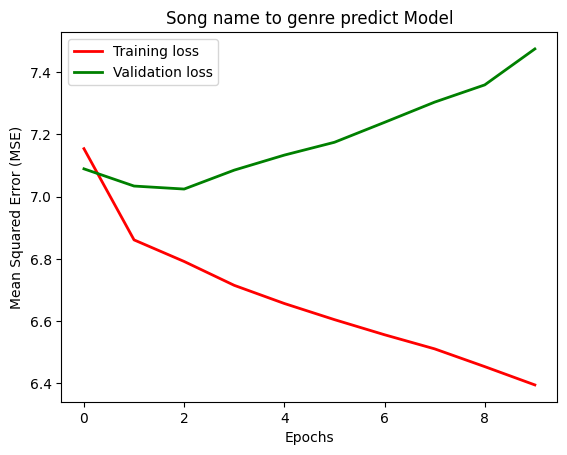

In [18]:
import matplotlib.pyplot as plt

# Access the training history of the model
hist = model.history.history

# Plot training loss in red and validation loss in green
plt.plot(hist['loss'], 'r', linewidth=2, label='Training loss')
plt.plot(hist['val_loss'], 'g', linewidth=2, label='Validation loss')

# Set plot title and labels
plt.title('Song name to genre predict Model')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [19]:
# Assume user_input is a string provided by the user
user_input = "Your text here"

# Preprocess the user input
# ... (perform the same preprocessing as we did for the training data)
input_sequence = tokenizer.texts_to_sequences([user_input])
padded_input = pad_sequences(input_sequence, maxlen=max_length)
# Make predictions
predictions = model.predict(padded_input)

# Interpret the results (assuming a classification problem)
predicted_class = np.argmax(predictions)# Print or use the predicted class

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 296ms/step
Predicted class: 6


# We didn't get good results for our model. I think it's because the data's correlation was low. However, if there is another mistake on my part, feel free to comment